In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import inspect
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('poster')
import re
import csv

## Load files

In [35]:
df = pandas.read_excel('../data/globalterrorismdb_0616dist.xlsx')

In [36]:
df_15_16 = pandas.read_excel('../data/Global Terrorism Database 2015-2016 Preliminary Data EMBARGOED.xlsx') 

In [37]:
# is the newest 2015 data same as last?
print df[df.iyear==2015].eventid.count()
print df_15_16[df_15_16.iyear==2015].eventid.count()

14806
14843


In [38]:
#let's use the latest 2015
df = pandas.concat([df[df.iyear < 2015], df_15_16])

Check basic stats

In [39]:
print df.eventid.count()
print df.iyear.unique()

170255
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982 1983
 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]


## Analyze claims

Percent claims by ISIS


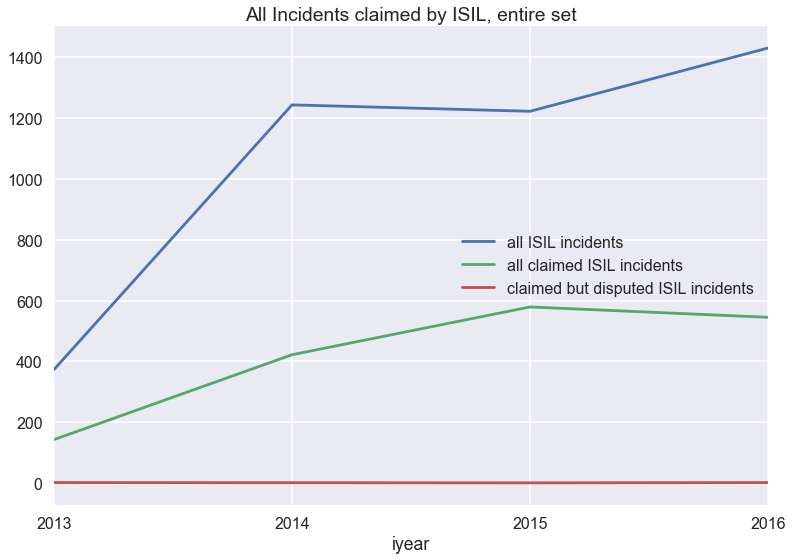

In [48]:
df[(df.gname == 'Islamic State of Iraq and the Levant (ISIL)')].groupby(['iyear']).eventid.count().plot(label='all ISIL incidents')
df[(df.gname == 'Islamic State of Iraq and the Levant (ISIL)') & (df.claimed==1)].groupby(['iyear']).eventid.count().plot(label='all claimed ISIL incidents')
df[(df.gname == 'Islamic State of Iraq and the Levant (ISIL)') & (df.claimed==1) & (df.guncertain1==1)].groupby(['iyear']).eventid.count().plot(label='claimed but disputed ISIL incidents')
plt.legend()
plt.xticks([2013,2014,2015,2016])
plt.title("All Incidents claimed by ISIL, entire set")

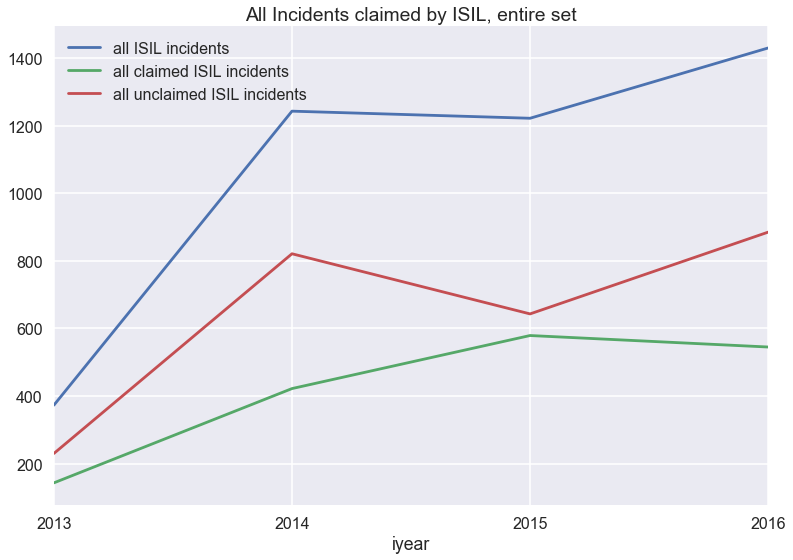

In [57]:
df[(df.gname == 'Islamic State of Iraq and the Levant (ISIL)')].groupby(['iyear']).eventid.count().plot(label='all ISIL incidents')
df[(df.gname == 'Islamic State of Iraq and the Levant (ISIL)') & (df.claimed==1)].groupby(['iyear']).eventid.count().plot(label='all claimed ISIL incidents')
df[(df.gname == 'Islamic State of Iraq and the Levant (ISIL)') & (df.claimed==0)].groupby(['iyear']).eventid.count().plot(label='all unclaimed ISIL incidents')
plt.legend()
plt.xticks([2013,2014,2015,2016])
plt.title("All Incidents claimed by ISIL, entire set")

## What about total number of claimed attacks by *all* groups


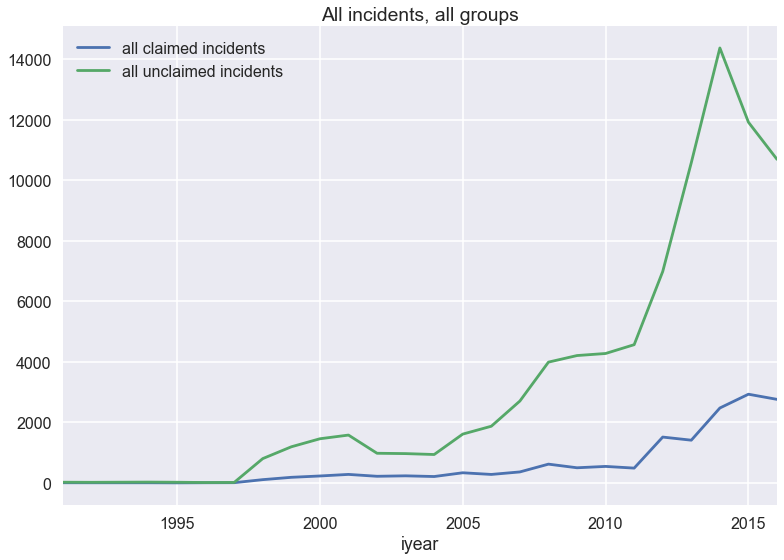

In [55]:
df[(df.claimed == 1)&(df.iyear > 1990)].groupby(['iyear']).eventid.count().plot(label='all claimed incidents')
df[(df.claimed == 0)&(df.iyear > 1990)].groupby(['iyear']).eventid.count().plot(label='all unclaimed incidents')
plt.legend()
plt.title("All incidents, all groups")


## Percent claimed over time 

(0, 1)

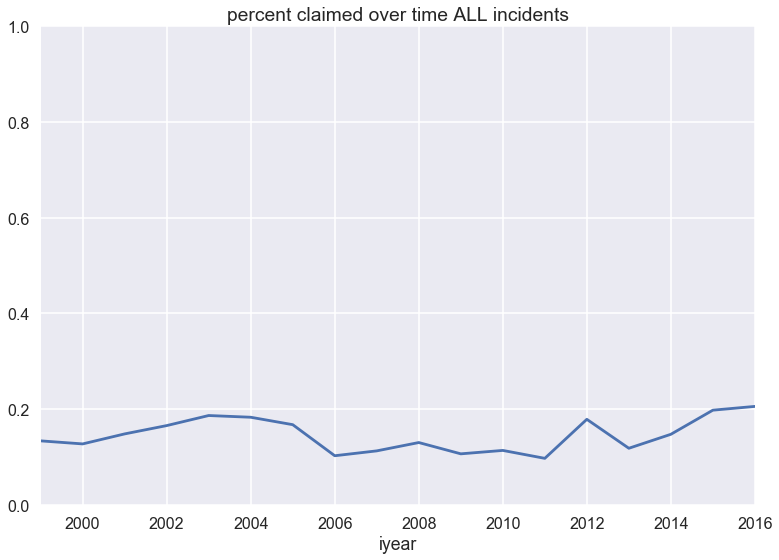

In [70]:
(df[(df.claimed == 1)&(df.iyear > 1998)].groupby(['iyear']).eventid.count() / df[(df.iyear > 1998)].groupby(['iyear']).eventid.count()).plot()
plt.title("percent claimed over time ALL incidents")
plt.ylim([0,1])

(0, 1)

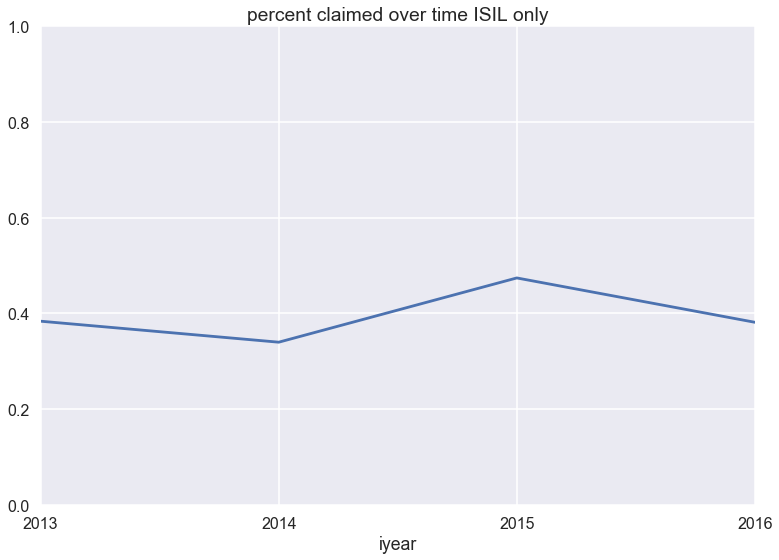

In [73]:
(df[(df.claimed == 1)&(df.iyear > 1998)&(df.gname == 'Islamic State of Iraq and the Levant (ISIL)')].groupby(['iyear']).eventid.count() / df[(df.iyear > 1998)&(df.gname == 'Islamic State of Iraq and the Levant (ISIL)')].groupby(['iyear']).eventid.count()).plot()
plt.title("percent claimed over time ISIL only")
plt.xticks([2013,2014,2015,2016])
plt.ylim([0,1])

## Claims and SIZE of attack

In [91]:
df[['claimed','nkill', 'nwound']].corr()

,claimed,nkill,nwound
claimed,1.000000,0.010691,0.001380
nkill,0.010691,1.000000,0.270278
nwound,0.001380,0.270278,1.000000


In [92]:
df[df.gname=='Islamic State of Iraq and the Levant (ISIL)'][['claimed','nkill', 'nwound']].corr()

,claimed,nkill,nwound
claimed,1.000000,0.030095,0.096326
nkill,0.030095,1.000000,0.169680
nwound,0.096326,0.169680,1.000000


## When no one dies, what is the % claimed?

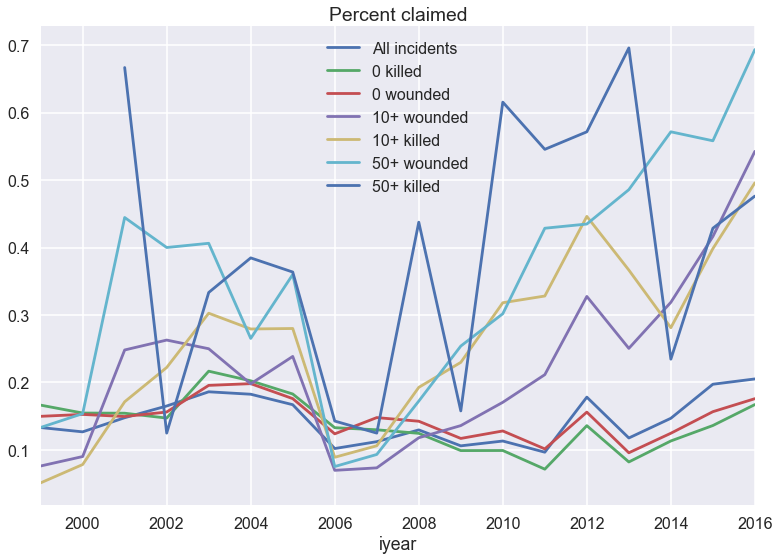

In [124]:
(df[(df.claimed == 1)&(df.iyear > 1998)].groupby(['iyear']).eventid.count() / df[(df.iyear > 1998)].groupby(['iyear']).eventid.count()).plot(label="All incidents")
(df[(df.claimed == 1)&(df.iyear > 1998) &(df.nkill==0)].groupby(['iyear']).eventid.count() / df[(df.iyear > 1998)&(df.nkill==0)].groupby(['iyear']).eventid.count()).plot(label="0 killed")
(df[(df.claimed == 1)&(df.iyear > 1998) &(df.nwound==0)].groupby(['iyear']).eventid.count() / df[(df.iyear > 1998)&(df.nwound==0)].groupby(['iyear']).eventid.count()).plot(label="0 wounded")
(df[(df.claimed == 1)&(df.iyear > 1998) &(df.nwound > 10)].groupby(['iyear']).eventid.count() / df[(df.iyear > 1998)&(df.nwound>10)].groupby(['iyear']).eventid.count()).plot(label="10+ wounded")
(df[(df.claimed == 1)&(df.iyear > 1998) &(df.nkill > 10)].groupby(['iyear']).eventid.count() / df[(df.iyear > 1998)&(df.nkill>10)].groupby(['iyear']).eventid.count()).plot(label="10+ killed")
(df[(df.claimed == 1)&(df.iyear > 1998) &(df.nwound > 50)].groupby(['iyear']).eventid.count() / df[(df.iyear > 1998)&(df.nwound>50)].groupby(['iyear']).eventid.count()).plot(label="50+ wounded")
(df[(df.claimed == 1)&(df.iyear > 1998) &(df.nkill > 50)].groupby(['iyear']).eventid.count() / df[(df.iyear > 1998)&(df.nkill>50)].groupby(['iyear']).eventid.count()).plot(label="50+ killed")

plt.legend()
plt.title("Percent claimed")

#plt.xticks([2013,2014,2015,2016]) 

## % claimed vs. nkill

In [141]:
is_integer = df.nkill.apply(lambda x:float(x).is_integer())
df_int = df[is_integer]  # because nonintegers are rare

In [158]:
df_int[df_int.nkill==1500]['summary'].values[0]

u'06/12/2014: Assailants abducted approximately 1686 soldiers from Camp Speicher in Tikrit city, Saladin governorate, Iraq. Two captives escaped custody and at least 1500, if not all of the remaining victims, are presumed dead. The Islamic State of Iraq and the Levant (ISIL) claimed responsibility and stated that the attacks were in revenge for the killing of ISIL leader Abdul-Rahman al-Beilawy.'

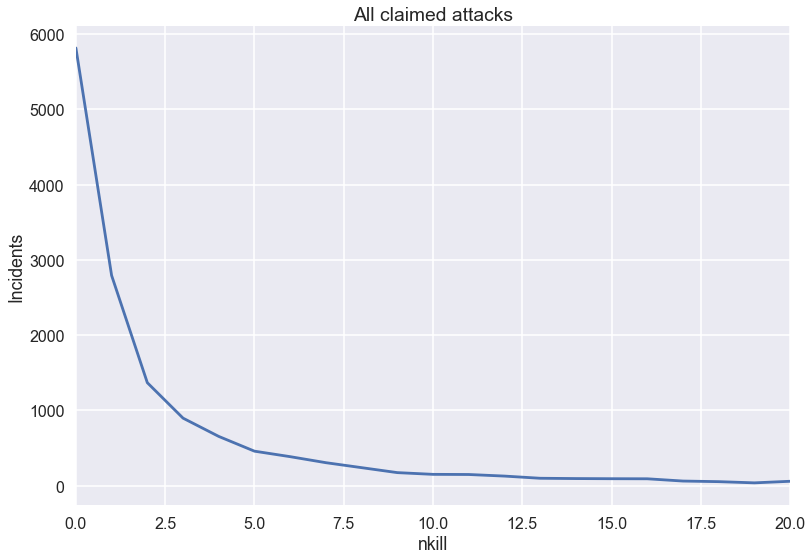

In [163]:
df_int[(df_int.claimed == 1)&(df_int.iyear > 1998)].groupby(['nkill']).eventid.count()[:20].plot()
plt.title('All claimed attacks')
plt.ylabel("Incidents")

In [173]:
df.nkill.describe()

count    160518.000000
mean          2.388710
std          11.328592
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1500.000000
Name: nkill, dtype: float64

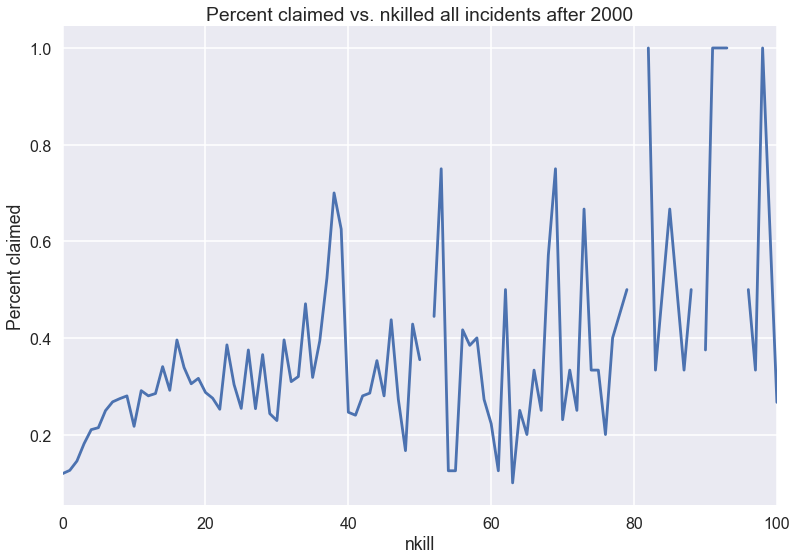

In [184]:
(df_int[(df_int.claimed == 1)&(df_int.iyear > 2000)].groupby(['nkill']).eventid.count() / df_int[(df_int.iyear > 1998)].groupby(['nkill']).eventid.count())[:100].plot()
plt.title('Percent claimed vs. nkilled all incidents after 2000')
plt.ylabel("Percent claimed")

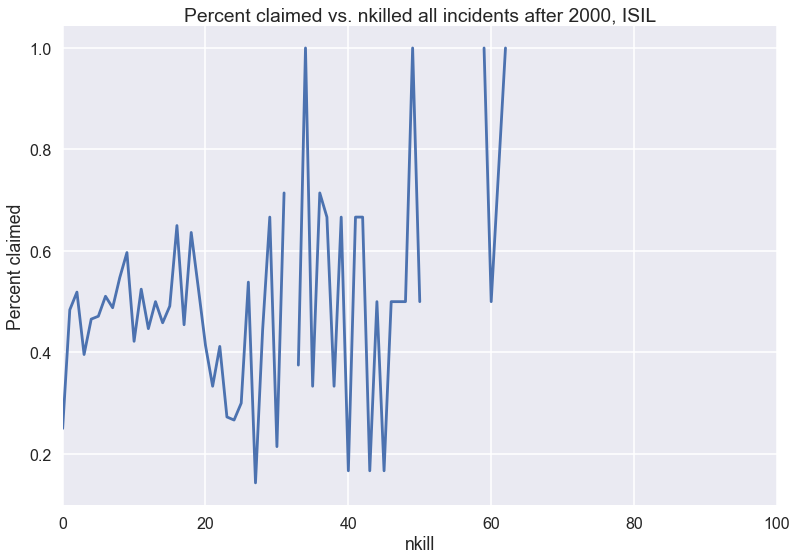

In [186]:
(df_int[(df_int.claimed == 1)&(df_int.iyear > 2000) & (df_int.gname == 'Islamic State of Iraq and the Levant (ISIL)')].groupby(['nkill']).eventid.count() / df_int[(df_int.iyear > 1998)&(df_int.gname == 'Islamic State of Iraq and the Levant (ISIL)')].groupby(['nkill']).eventid.count())[:100].plot()
plt.title('Percent claimed vs. nkilled all incidents after 2000, ISIL')
plt.ylabel("Percent claimed")

## Claimed and unclaimed attacks over years

In [195]:
df[(df.iyear > 1997)].groupby(['iyear', 'claimed']).eventid.count().to_csv('../data/cover-story/claimed-unclaimed-allgrps.csv')
df[(df.iyear > 1997)].groupby(['iyear', 'claimed']).eventid.count()
df[(df.iyear > 1997)].groupby(['iyear']).eventid.count()

iyear
1998      933
1999     1396
2000     1813
2001     1908
2002     1332
2003     1262
2004     1161
2005     2011
2006     2751
2007     3241
2008     4787
2009     4721
2010     4821
2011     5067
2012     8498
2013    11990
2014    16840
2015    14843
2016    13446
Name: eventid, dtype: int64

## Who claims most attacks (2016)

In [7]:
df[(df.iyear ==2016)&(df.claimed==1)].groupby(['iyear', 'gname']).eventid.count().sort_values(ascending=False)

iyear  gname                                                                
2016   Islamic State of Iraq and the Levant (ISIL)                              545
       Taliban                                                                  469
       Al-Shabaab                                                               267
       Tehrik-i-Taliban Pakistan (TTP)                                           80
       Sinai Province of the Islamic State                                       75
       New People's Army (NPA)                                                   58
       Khorasan Chapter of the Islamic State                                     54
       Huthi Extremists                                                          50
       Communist Party of India - Maoist (CPI-Maoist)                            48
       Maoists                                                                   46
       Tripoli Province of the Islamic State                                     44

### Total number of claimed

In [11]:
#Number of claims total
df[(df.iyear ==2016)&(df.claimed==1)].eventid.count()

2760

### Number of unclaimed attacks

In [14]:
df[(df.iyear ==2016)&(df.claimed==0)].groupby(['iyear', 'gname']).eventid.count().sort_values(ascending=False)

iyear  gname                                                      
2016   Unknown                                                        5929
       Islamic State of Iraq and the Levant (ISIL)                     885
       Taliban                                                         592
       Kurdistan Workers' Party (PKK)                                  335
       Huthi Extremists                                                298
       Al-Shabaab                                                      282
       Boko Haram                                                      222
       Maoists                                                         221
       Fulani Militants                                                154
       Tripoli Province of the Islamic State                           139
       Palestinian Extremists                                          120
       New People's Army (NPA)                                         114
       Sinai Province of the Isla

### Ratio of claimed to unclaimed

In [84]:
df[(df.iyear ==2016)&(df.gname=='Islamic State of Iraq and the Levant (ISIL)')].eventid.count()

1430

In [58]:
unclaimed = df[(df.iyear ==2016)&(df.claimed==0)].groupby(['gname']).eventid.count().to_csv('../data/cover-story/unclaimed-count.csv')
claimed = df[(df.iyear ==2016)&(df.claimed==1)].groupby(['gname']).eventid.count().to_csv('../data/cover-story/claimed-count.csv')
dispute = df[(df.iyear ==2016)&(df.guncertain1==1)].groupby(['gname']).eventid.count().to_csv('../data/cover-story/guncertain.csv')

In [86]:
percent_claimed = df[(df.iyear ==2016)].groupby(['gname']).apply(lambda x:sum(x['claimed'] == 1) / (1.0*len(x['claimed']))).sort_values(ascending=False)
percent_claimed[percent_claimed.index=='Islamic State of Iraq and the Levant (ISIL)']
percent_claimed.mean()
percent_claimed.describe()

count    328.000000
mean       0.495971
std        0.441024
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
dtype: float64

In [79]:
df[(df.iyear ==2016)].groupby(['gname']).apply(lambda x:sum(x['guncertain1'] == 1) / (1.0*len(x['claimed']))).sort_values(ascending=False)


gname
Kuki Unification Frontal Organization (KUFO)                       1.000000
Kurdish Democratic Party-Iraq (KDP)                                1.000000
Al-Khobar                                                          1.000000
Nuer White Army                                                    1.000000
Parbatya Chattagram Jana Sanghati Samity (PCJSS) - Bangladesh      1.000000
Black Hebrew Israelites                                            1.000000
People's Democratic Party (PDP)                                    1.000000
Baloch Nationalists                                                1.000000
Awami League                                                       1.000000
National Socialist Council of Nagaland-Unification (NSCN-U)        1.000000
Arakan Army (AA)                                                   1.000000
Democratic Youth Federation of India (DYFI)                        1.000000
Sanaa Province of the Islamic State                                1.000000
Shamil

In [ ]:
df[(df.iyear == 2016)&(df.claimed==1)]